## K Nearest Neighbors

This code shows examples taken from the sklearn documentation of the use of the kNN (k nearest neighbors) approach to solving both classification and regression problems. The readymade kNN classifier and regressor from sklearn are used, respectively. The purpose is to explore the influence of the number of neighbors and the weighting method chosen on the performance of the algorithm. 

## KNN Classification Example

### Import and prepare data

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# import iris data
iris = datasets.load_iris()

X = iris.data[:, :2] # only take the first two features
y = iris.target
#print(X,y)
#print(X.size,y.size)

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

### Train a kNN classifier for both weighting approaches

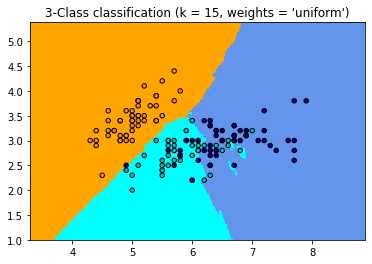

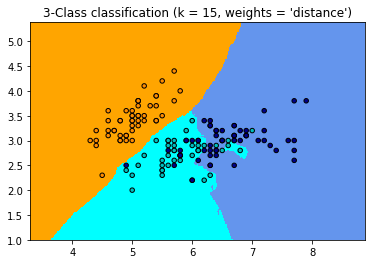

In [24]:
n_neighbors = 15

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

## KNN Regression Example

(Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
        Fabian Pedregosa <fabian.pedregosa@inria.fr>
License: BSD 3 clause (C) INRIA) 

### Generate data randomly

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(6)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

### Train a kNN regressor and plot the results

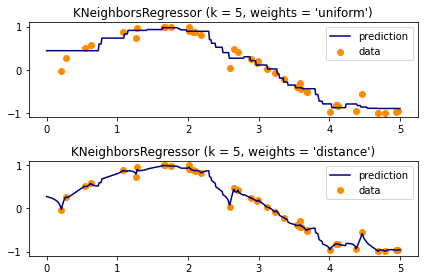

In [31]:
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,weights))

plt.tight_layout()
plt.show()